In [51]:
!pip install opendatasets
!pip install pandas

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [52]:
from fastai.imports import *
np.set_printoptions(linewidth=130)
import pandas as pd

In [53]:
df = pd.read_csv('spaceship-titanic/train.csv')
tst_df = pd.read_csv('spaceship-titanic/test.csv')

In [54]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [55]:
tst_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [56]:
modes = df.mode().iloc[0]

In [57]:
def proc_data(df):
    df['FoodCourt'] = df.FoodCourt.fillna(0)
    df['ShoppingMall'] = df.ShoppingMall.fillna(0)
    df['RoomService'] = df.RoomService.fillna(0)
    df['Spa'] = df.Spa.fillna(0)
    df['VRDeck'] = df.VRDeck.fillna(0)
    df.fillna(modes, inplace=True)
    df['LogFoodFare'] = np.log(df['FoodCourt']+1)
    df['LogShopFare'] = np.log(df['ShoppingMall']+1)
    df['LogRoomFare'] = np.log(df['RoomService']+1)
    df['LogSpaFare'] = np.log(df['Spa']+1)
    df['LogVRFare'] = np.log(df['VRDeck']+1)
        

proc_data(df)
proc_data(tst_df)

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'RoomService'}>, <Axes: title={'center': 'FoodCourt'}>],
       [<Axes: title={'center': 'ShoppingMall'}>, <Axes: title={'center': 'Spa'}>, <Axes: title={'center': 'VRDeck'}>],
       [<Axes: title={'center': 'LogFoodFare'}>, <Axes: title={'center': 'LogShopFare'}>,
        <Axes: title={'center': 'LogRoomFare'}>],
       [<Axes: title={'center': 'LogSpaFare'}>, <Axes: title={'center': 'LogVRFare'}>, <Axes: >]], dtype=object)

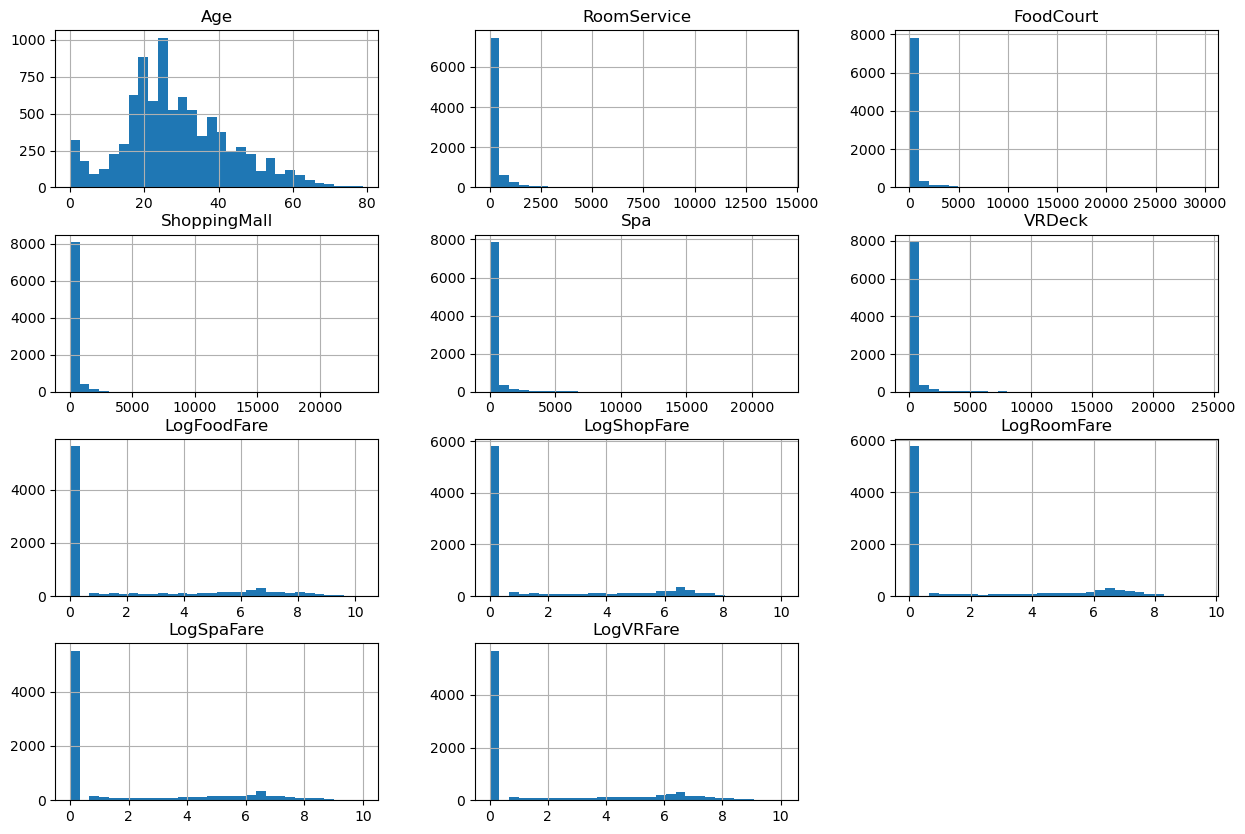

In [58]:
df.hist(bins=30, figsize=(15, 10))

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  LogFoodFare   8693 non-null   float64
 15  LogShopFare   8693 non-null   float64
 16  LogRoomFare   8693 non-null   float64
 17  LogSpaFare    8693 non-null   float64
 18  LogVRFare     8693 non-null 

In [60]:
df.describe(include=[object])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8693
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Alraium Disivering
freq,1,4803,207,6097,202


In [61]:
df = pd.get_dummies(df, columns=["HomePlanet","Destination"])
tst_df = pd.get_dummies(tst_df, columns=["HomePlanet","Destination"])

In [62]:
tst_df.describe(include=[bool])

,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
count,4277,4277,4277,4277,4277,4277,4277,4277
unique,2,2,2,2,2,2,2,2
top,False,False,True,False,False,False,False,True
freq,2733,4203,2350,3275,3352,3436,3889,3048


In [63]:
def proc_bool(df):
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    df["VIP"] = df["VIP"].astype(int)
    df["HomePlanet_Earth"] = df["HomePlanet_Earth"].astype(int)
    df["HomePlanet_Europa"] = df["HomePlanet_Europa"].astype(int)
    df["HomePlanet_Mars"] = df["HomePlanet_Mars"].astype(int)
    df["Destination_55_Cancri-e"] = df["Destination_55 Cancri e"].astype(int)
    df["Destination_PSO_J318.5-22"] = df["Destination_PSO J318.5-22"].astype(int)
    df["Destination_TRAPPIST-1e"] = df["Destination_TRAPPIST-1e"].astype(int)

proc_bool(df)
proc_bool(tst_df)

In [64]:
df["Transported"] = df["Transported"].astype(int)

In [65]:
df = df.drop(columns=['Destination_55 Cancri e'])
df = df.drop(columns=['Destination_PSO J318.5-22'])
tst_df = tst_df.drop(columns=['Destination_55 Cancri e'])
tst_df = tst_df.drop(columns=['Destination_PSO J318.5-22'])

In [70]:
df

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,LogShopFare,LogRoomFare,LogSpaFare,LogVRFare,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_TRAPPIST-1e,Destination_55_Cancri-e,Destination_PSO_J318.5-22
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0,1,0,1,0,0
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,...,3.258097,4.700480,6.309918,3.806662,1,0,0,1,0,0
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,0.000000,3.784190,8.812248,3.912023,0,1,0,1,0,0
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,5.918894,0.000000,8.110728,5.267858,0,1,0,1,0,0
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,...,5.023881,5.717028,6.338594,1.098612,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,...,0.000000,0.000000,7.404888,4.317488,0,1,0,0,1,0
8689,9278_01,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1
8690,9279_01,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,...,7.535297,0.000000,0.693147,0.000000,1,0,0,1,0,0
8691,9280_01,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,...,0.000000,0.000000,5.869297,8.082093,0,1,0,0,1,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int64  
 2   Cabin                      8693 non-null   object 
 3   Age                        8693 non-null   float64
 4   VIP                        8693 non-null   int64  
 5   RoomService                8693 non-null   float64
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8693 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Name                       8693 non-null   object 
 11  Transported                8693 non-null   int64  
 12  LogFoodFare                8693 non-null   float64
 13  LogShopFare                8693 non-null   float

In [71]:
cats=["CryoSleep","VIP", "HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars", "Destination_TRAPPIST-1e", "Destination_55_Cancri-e", "Destination_PSO_J318.5-22"]
conts=['Age', 'LogFoodFare', 'LogShopFare', 'LogRoomFare','LogSpaFare', 'LogVRFare']
dep="Transported"

In [72]:
df.Transported.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [74]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 457.3 kB/s eta 0:00:001m472.0 kB/s eta 0:00:01


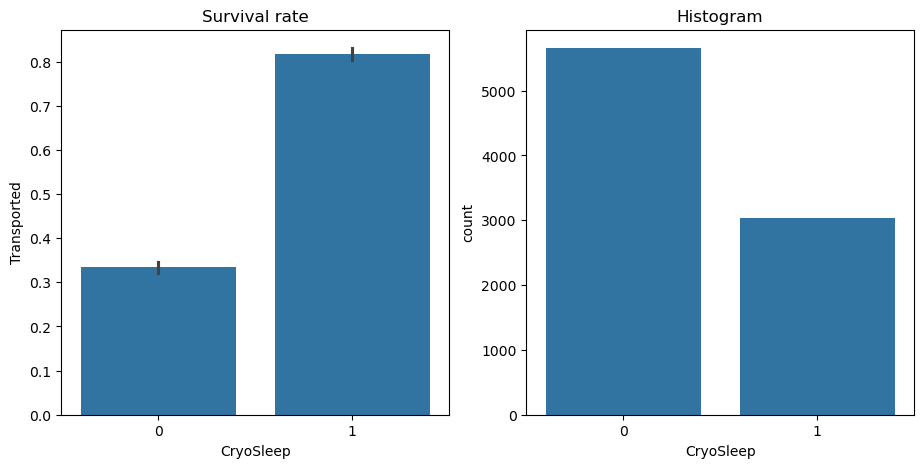

In [75]:
import seaborn as sns

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=df, y=dep, x="CryoSleep", ax=axs[0]).set(title="Survival rate")
sns.countplot(data=df, x="CryoSleep", ax=axs[1]).set(title="Histogram");

In [79]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)

In [80]:
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

In [81]:
preds = val_xs.CryoSleep==1

In [82]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, preds)

0.2755289788408464

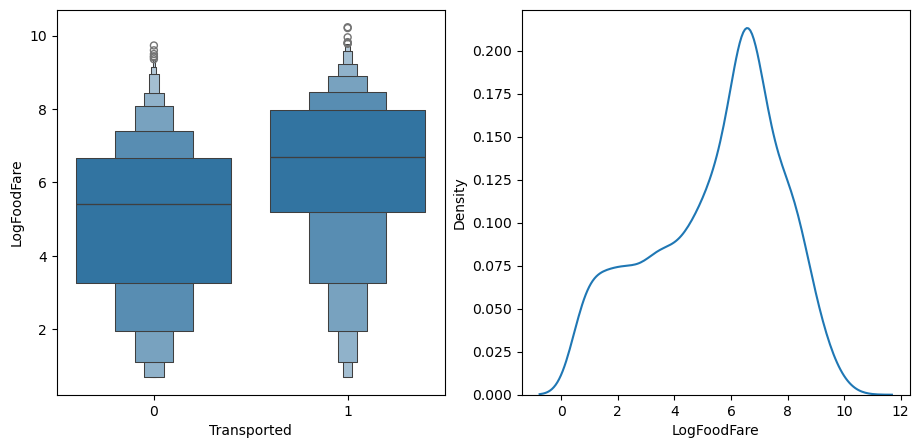

In [84]:
df_Foodfare = trn_df[trn_df.LogFoodFare>0]
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.boxenplot(data=df_Foodfare, x=dep, y="LogFoodFare", ax=axs[0])
sns.kdeplot(data=df_Foodfare, x="LogFoodFare", ax=axs[1]);

In [89]:
preds = val_xs.LogFoodFare<6

In [90]:
mean_absolute_error(val_y, preds)

0.4779208831646734

In [91]:
def _side_score(side, y):
    tot = side.sum()
    if tot<=1: return 0
    return y[side].std()*tot

In [92]:
def score(col, y, split):
    lhs = col<=split
    return (_side_score(lhs,y) + _side_score(~lhs,y))/len(y)

In [93]:
score(trn_xs["CryoSleep"], trn_y, 0.5)

0.4427274084379482

In [94]:
score(trn_xs["LogFoodFare"], trn_y, 2.7)

0.49292374292361096

In [96]:
def iscore(nm, split):
    col = trn_xs[nm]
    return score(col, trn_y, split)

from ipywidgets import interact
interact(nm=conts, split=15.5)(iscore);

interactive(children=(Dropdown(description='nm', options=('Age', 'LogFoodFare', 'LogShopFare', 'LogRoomFare', …

In [97]:
interact(nm=cats, split=2)(iscore);

interactive(children=(Dropdown(description='nm', options=('CryoSleep', 'VIP', 'HomePlanet_Earth', 'HomePlanet_…

In [98]:
nm = "Age"
col = trn_xs[nm]
unq = col.unique()
unq.sort()
unq

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
       24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
       48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71.,
       72., 73., 74., 75., 76., 77., 78., 79.])

In [99]:
scores = np.array([score(col, trn_y, o) for o in unq if not np.isnan(o)])
unq[scores.argmin()]

5.0

In [100]:
def min_col(df, nm):
    col,y = df[nm],df[dep]
    unq = col.dropna().unique()
    scores = np.array([score(col, y, o) for o in unq if not np.isnan(o)])
    idx = scores.argmin()
    return unq[idx],scores[idx]

min_col(trn_df, "Age")

(5.0, 0.49588222217088634)

In [101]:
cols = cats+conts
{o:min_col(trn_df, o) for o in cols}

{'CryoSleep': (0, 0.4427274084379482),
 'VIP': (0, 0.4997003165253164),
 'HomePlanet_Earth': (0, 0.49262732535926257),
 'HomePlanet_Europa': (0, 0.4921228311603196),
 'HomePlanet_Mars': (0, 0.4999212060886803),
 'Destination_TRAPPIST-1e': (0, 0.49805643699129726),
 'Destination_55_Cancri-e': (0, 0.4975146234286769),
 'Destination_PSO_J318.5-22': (1, 0.5000218277565598),
 'Age': (5.0, 0.49588222217088634),
 'LogFoodFare': (0.0, 0.4864171323280328),
 'LogShopFare': (0.0, 0.4838374399256237),
 'LogRoomFare': (0.0, 0.4712139445780011),
 'LogSpaFare': (0.0, 0.46960050421496596),
 'LogVRFare': (0.0, 0.47094236980183707)}

In [102]:
cols.remove("CryoSleep")
isSleep = trn_df.CryoSleep==1
sleep,noSleep = trn_df[isSleep],trn_df[~isSleep]

In [104]:
{o:min_col(sleep, o) for o in cols}

{'VIP': (0, 0.3837817238636689),
 'HomePlanet_Earth': (0, 0.3324940920248624),
 'HomePlanet_Europa': (0, 0.33755676507769095),
 'HomePlanet_Mars': (0, 0.3786057986987219),
 'Destination_TRAPPIST-1e': (0, 0.3843517005617657),
 'Destination_55_Cancri-e': (0, 0.3740458872508508),
 'Destination_PSO_J318.5-22': (0, 0.3807357889360303),
 'Age': (25.0, 0.38204553257058477),
 'LogFoodFare': (0.0, 0.38524640908573105),
 'LogShopFare': (0.0, 0.38524640908573105),
 'LogRoomFare': (0.0, 0.38524640908573105),
 'LogSpaFare': (0.0, 0.38524640908573105),
 'LogVRFare': (0.0, 0.38524640908573105)}

In [105]:
{o:min_col(noSleep, o) for o in cols}

{'VIP': (1, 0.4730642283444852),
 'HomePlanet_Earth': (0, 0.4726119049767322),
 'HomePlanet_Europa': (0, 0.4709438743367081),
 'HomePlanet_Mars': (0, 0.4726373259650845),
 'Destination_TRAPPIST-1e': (0, 0.4727980400075047),
 'Destination_55_Cancri-e': (0, 0.47260926249874624),
 'Destination_PSO_J318.5-22': (1, 0.4730642283444852),
 'Age': (12.0, 0.46380962227595895),
 'LogFoodFare': (7.193685818395112, 0.4632830161736957),
 'LogShopFare': (6.440946540632921, 0.46541478497591),
 'LogRoomFare': (5.846438775057725, 0.4585999894343045),
 'LogSpaFare': (6.1224928095143865, 0.45865870936480796),
 'LogVRFare': (8.316055720364643, 0.4640202339045242)}

In [107]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y);

In [109]:
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.1 MB/s eta 0:00:00


In [110]:
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))


In [112]:
def gini(cond):
    act = df.loc[cond, dep]
    return 1 - act.mean()**2 - (1-act).mean()**2

In [113]:
gini(df.CryoSleep=='noSleep'), gini(df.CryoSleep=='sleep')

(nan, nan)

In [114]:
mean_absolute_error(val_y, m.predict(val_xs))

0.2755289788408464

In [116]:
m = DecisionTreeClassifier(min_samples_leaf=50)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=12)

ExecutableNotFound: failed to execute Path('dot'), make sure the Graphviz executables are on your systems' PATH